# Laboratorio 4 - Parte 2

### Redes Neuronales Artificiales: RNN y SOM

### 2019-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante: Santiago Alexis Sanchez Zuleta
#### Segundo Integrante: Raúl Ándres Ramiréz Goméz

In [1]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")


## Ejercicio 1

En este ejercicio vamos a utilizar dos bases de datos diferentes para entrenar dos mapas auto-organizables.

1. La base de datos iris 
2. La base de datos de dígitos escritos. 

Si bien en estas dos bases de datos las muestras cuentan con etiquetadas de salida, las vamos a usar para evaluar el agrupamiento que produce un SOM, es decir que **no usaremos las etiquetas** e intentaremos que el modelo descubra los grupos de muestras similares que hay en los datos. Tenga en cuenta el número de clases en cada una de las bases de datos para los análisis posteriores.

In [2]:
#!pip3 install git+https://github.com/sevamoo/SOMPY.git
from sklearn.datasets import load_iris
from numpy import random
import sompy
import sys
sys.path.insert(0, '../../library/')
from sklearn.preprocessing import StandardScaler
import showsompy as sm


data = load_iris()
X_iris = data.data
#Definimos una lista de colores de acuerdo con las clases originales
colors = ["red"] * 50
colors.extend(["yellow"] * 50)
colors.extend(["blue"] * 50)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

In [3]:
#Normalizar
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X_iris)
n_columns = 50
n_rows =50
Xn

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

Para el trabajo usaremos el paquete SOMPY, use la siguiente instrucción

```
!pip3 install git+https://github.com/sevamoo/SOMPY.git
```
La documentación se pueden consultar en : https://github.com/sevamoo/SOMPY. 

Complete el siguiente código para entrenar un SOM con los datos almacenados en la variable Xn (Datos normalizados), use una cuadrícula de neuronas de 50 por 50 y un número de épocas igual a 100. 

In [4]:
mapsize = [n_columns,n_rows]
component_names = ['sepal length','sepal width', 'petal length','petal width']
#mapsize = [10,10]
som_iris = sompy.SOMFactory.build(Xn, mapsize, normalization='var', initialization='random', neighborhood='gaussian', name='sompy')
type(som_iris)

#sm = sompy.SOMFactory().build(colors, [20, 30], normalization = 'var', initialization='random', neighborhood = 'gaussian', component_names=['R','G','B'])

som_iris.train(n_job=1, verbose='info', train_rough_len=2, train_finetune_len=100)
#sm.train(n_job=4, verbose=False, train_len_factor=0.5, train_rough_len=2, train_finetune_len=100)


 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 2

 epoch: 1 ---> elapsed time:  0.261000, quantization error: 0.357149

 epoch: 2 ---> elapsed time:  0.307000, quantization error: 1.528489

 Finetune training...
 radius_ini: 4.166667 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.314000, quantization error: 0.419136

 epoch: 2 ---> elapsed time:  0.328000, quantization error: 0.339903

 epoch: 3 ---> elapsed time:  0.325000, quantization error: 0.257970

 epoch: 4 ---> elapsed time:  0.350000, quantization error: 0.239185

 epoch: 5 ---> elapsed time:  0.317000, quantization error: 0.227005

 epoch: 6 ---> elapsed time:  0.349000, quantization error: 0.221862

 epoch: 7 ---> elapsed time:  0.322000, quantization error: 0.217388

 epoch: 8 ---> elapsed time:  0.323000, quantization error: 0.215622

 epoch: 9 ---> elapsed time:  0.313000, quantization error: 0.213373

 epoc

Una vez entrenado el modelo ejecute la siguiente celda, la cuál grafica la matriz U extraída del SOM:

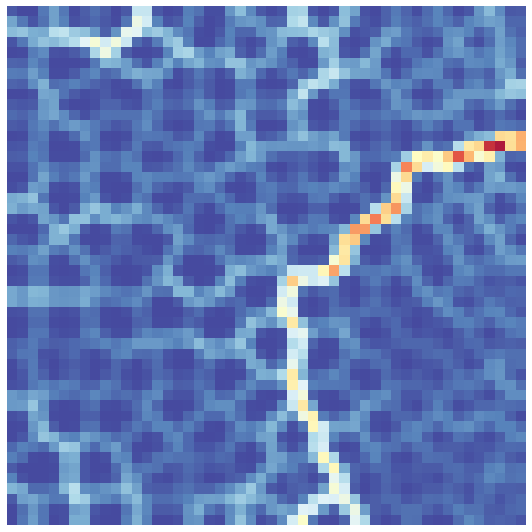

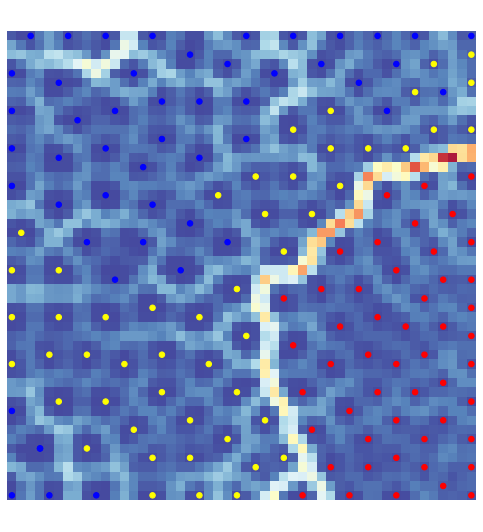

array([[0.03749974, 0.00482296, 0.00479492, ..., 0.16297259, 0.03790055,
        0.04748277],
       [0.23175691, 0.11672475, 0.02927636, ..., 0.20348396, 0.0720761 ,
        0.07188972],
       [0.29790212, 0.32654271, 0.25778493, ..., 0.22213464, 0.09693039,
        0.05882074],
       ...,
       [0.04617776, 0.21253429, 0.23716844, ..., 0.03174099, 0.06044713,
        0.08099676],
       [0.00422662, 0.0926259 , 0.1916967 , ..., 0.04671553, 0.07190564,
        0.08102009],
       [0.0051726 , 0.10980155, 0.21202013, ..., 0.06835405, 0.05421045,
        0.03052749]])

In [5]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

umat = u.build_u_matrix(som_iris, distance=1, row_normalized=False)
sm.show(umat,som_iris, show_data=False)
sm.show(umat,som_iris,colors=colors)

Responda:

1.1 ¿Qué es la matrix U (En inglés U-matrix) de un SOM?

R/La matrix U (Unified Distance Matrix)  es una representación de un mapa autorganizado, donde la la distancia euclidiana de los vectores de las neuronas vecinas normalmente en escala de grises, su itulidad es para visualizar en una imagen 2-D los datos de una alta dimensión.

1.2 ¿Cómo se pueden interpretar las gráficas obtenidas en el punto anterior? Describa detalladamente lo que observa e interprételo de acuerdo con la definición que dio en el punto 1.1

R/Las lineas blancas son las "fronteras" de los datos en el primer mapa se oservan más claramente, pero con los datos se puede mirar una distinción entre ellos, podemos decir que las zonas más claras representan una mayor separación y la oscuras menos separación en una distancia.

Ejecute la siguiente instrucción:

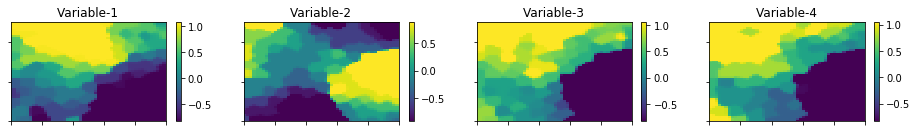

In [6]:
from sompy.visualization.mapview import View2D
view2D  = View2D(100,100,"rand data",text_size=10)
view2D.show(som_iris, col_sz=4, which_dim="all", denormalize=True)

Responda:

1.3 ¿Qué se está gráficando en las figuras? 

R/ La agrupación de los datos segun sus componentes.

1.4 ¿Qué utilidad tienen las gráficas anteriores?

R/ La utilidad de estas graficas es para mirar la correlación entre los datos según esten agrupados por sus componentes.

1.5 ¿De acuerdo con las gráficas anteriores cuáles variables en el problema están correlacionadas?

R/ Las variables que estan más correlacionadas según las graficas son las correspondientes a la variables 3 y 4 es decir 'petal length' y 'petal width'.

In [7]:
codebook = som_iris._normalizer.denormalize_by(som_iris.data_raw, som_iris.codebook.matrix)
mp = codebook.reshape(som_iris.codebook.mapsize[0],som_iris.codebook.mapsize[1],codebook.shape[1])
mp.shape

(50, 50, 4)

## Ejercicio 2

Repita el proceso anterior para los datos del problema de reconocimiento de dígitos escritos a mano. Ejecute la siguiente celda para cargar los datos

In [8]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X_digits = data
Y = digits.target

#Definimos una lista de colores de acuerdo con las clases en Y
color_digits = []
for i in range(len(Y)):
    if Y[i] == 0:
        color_digits.append('red')
    elif Y[i] == 1:
        color_digits.append('blue')
    elif Y[i] == 2:
        color_digits.append('green')
    elif Y[i] == 3:
        color_digits.append('yellow')

In [9]:
random.seed(19680801)
scaler = StandardScaler()
Xn_dig = scaler.fit_transform(X_digits);

map_size = [50,50]

Entrene un SOM a partir de los datos cargados en la celda anterior. En este caso utilice un SOM con una capa de neuronas 50x50.

In [10]:
som_digits =sompy.SOMFactory.build(Xn_dig,mapsize, normalization='var', initialization='random', neighborhood='gaussian', name='sompy')
type(som_digits)
som_digits.train(n_job=1, verbose='info', train_rough_len=2, train_finetune_len=100)


 Training...
 random_initialization took: 0.005000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 2

 epoch: 1 ---> elapsed time:  0.458000, quantization error: 9.258661

 epoch: 2 ---> elapsed time:  0.413000, quantization error: 6.043231

 Finetune training...
 radius_ini: 4.166667 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.341000, quantization error: 5.303876

 epoch: 2 ---> elapsed time:  0.345000, quantization error: 5.270422

 epoch: 3 ---> elapsed time:  0.337000, quantization error: 5.104983

 epoch: 4 ---> elapsed time:  0.326000, quantization error: 5.013460

 epoch: 5 ---> elapsed time:  0.335000, quantization error: 4.957727

 epoch: 6 ---> elapsed time:  0.328000, quantization error: 4.912837

 epoch: 7 ---> elapsed time:  0.317000, quantization error: 4.888239

 epoch: 8 ---> elapsed time:  0.326000, quantization error: 4.868633

 epoch: 9 ---> elapsed time:  0.330000, quantization error: 4.852578

 epoc

Una vez entrenado el SOM, ejecute la siguiente celda

(50, 50)


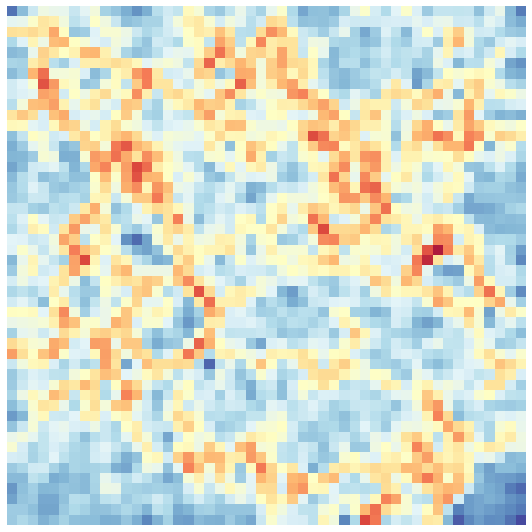

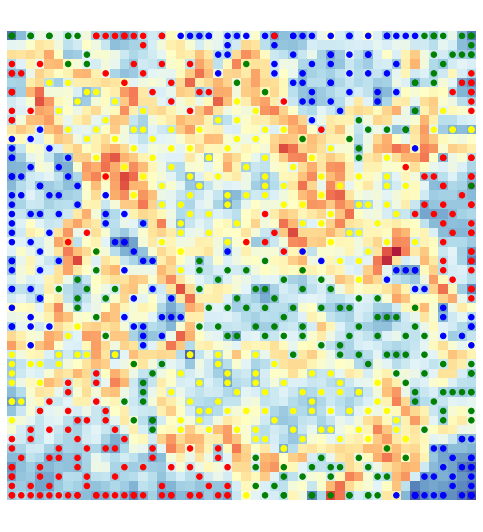

array([[0.62463612, 1.01598039, 1.37700462, ..., 1.56966764, 0.99219231,
        0.66797797],
       [1.53367657, 1.55430027, 1.74216775, ..., 1.42261764, 1.01585373,
        0.90696464],
       [2.0427446 , 2.02210036, 2.07468038, ..., 1.22140973, 1.11023628,
        1.0816874 ],
       ...,
       [0.86742675, 1.06995196, 1.1066882 , ..., 0.89420945, 0.7871808 ,
        0.71557904],
       [1.12446231, 1.11474886, 1.03206279, ..., 0.78122344, 0.7293324 ,
        0.65601697],
       [1.10743004, 1.20840552, 1.12770186, ..., 0.7575505 , 0.61423197,
        0.4188385 ]])

In [11]:
u_digits = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

umat_digits = u_digits.build_u_matrix(som_digits, distance=1, row_normalized=False)
print(umat_digits.shape)
sm.show(umat_digits,som_digits, show_data=False)
sm.show(umat_digits,som_digits,colors=color_digits)

Responda:

2.1 ¿Qué diferencia observa entre la matrix U en este caso vs el anterior?

R/Tiene más zonas claras, su separación a direncia de la anterior es más compleja.

2.2 ¿Qué puede concluir a partir de la gráfica que incluye la ubicación de las neuronas ganadoras para cada muestra de entrada?

R/ Los datos están más separados y tienen más fronteras, la dispersión entre ellos es más notoria entre los datos de la misma clase, esto evidente al mirar su agrupacion por subgrupos.

## Ejercicio 3

En este ejercicio entrenaremos una Red Neuronal Recurrente para la predicción de una serie de tiempo. Este problema corresponde a una configuración many-to-many. En este caso usaremos una serie de tiempo que corresponde al número de pasajeros internacionales por mes, desde el año 1949 hasta el año 1960. La serie de tiempo puede ser consultada en: https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line 

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

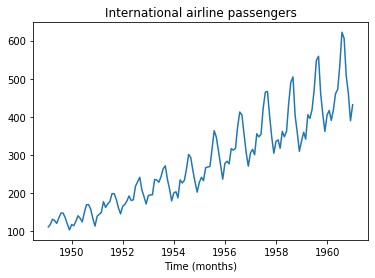

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('DB/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#---- Tiempos para los datos originales---
date_begin = np.datetime64('1949-01')
date_end = np.datetime64('1961-01')
Time = pd.date_range(date_begin, date_end, freq='M')

plt.plot(Time,dataset)
plt.title('International airline passengers')
plt.xlabel('Time (months)')
plt.show()

El paquete que usaremos en este caso para el entrenamiento de redes neuronales recurrentes es neurolab.
Use la instrucción:
```!pip3 install neurolab
```
La documentación puede ser consultada en : https://pythonhosted.org/neurolab/.

In [13]:
#!pip3 install neurolab
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 

3.1 Complete el código siguiente y entrene una red neuronal recurrente de Elman, con una capa oculta y una capa de salida. Use función de activación tangente hiperbólica para la capa oculta y lineal para la capa de salida. Use un número de épocas igual a 1000, y un objetivo de error inferior a 0.00001. Inicialice los pesos de las capas aleatoriamente entre [-0.1, 0.1].

In [14]:
import neurolab as nl
from sklearn.preprocessing import MinMaxScaler
random.seed(19680801)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t-look_back+1:t and Y=t+1
look_back = 1 # Retardos de tiempo por muestra
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#Esta variable se requiere para definir la red de acuerdo con la librería neurolab. Define el número de entradas y el rango de valores que toma cada entrada
layers = []
for i in range(look_back):
    layers.append([0, 1])

# Crear la red e inicializar los pesos.
# Create network with 2 layers
net =  nl.net.newelm(layers, [30, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

# Entrenar la red con los datos de entrenamiento
# Set initialized functions and init
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()
# Train network
error = net.train(trainX, trainY.reshape(trainX.shape[0],1), epochs=1000, show=100, goal=0.00001)

# Evaluar la red con los datos de test
# Simulate network
output = net.sim(testX)


# Calculo de error
Error = MAPE(output,testY)

print('MAPE = ' + str(np.mean(Error)))

Epoch: 100; Error: 0.01370513609702119;
Epoch: 200; Error: 0.0020637559855200293;
Epoch: 300; Error: 0.001925708831550673;
Epoch: 400; Error: 0.0019156919059595092;
Epoch: 500; Error: 0.001911129021363977;
Epoch: 600; Error: 0.001952683603389275;
Epoch: 700; Error: 0.001895949193091655;
Epoch: 800; Error: 0.0019305455714247566;
Epoch: 900; Error: 0.0018972260580496676;
Epoch: 1000; Error: 0.001898214034863231;
The maximum number of train epochs is reached
MAPE = 0.12609710344748157


3.1 Haga una gráfica de la salida real vs la mejor predicción hecha por la red. Recuerde incluir los tiempos apropiados en el eje x y usar el método plt.legend() para identificar cuál es la serie real y cual la predicción.

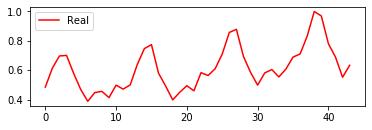

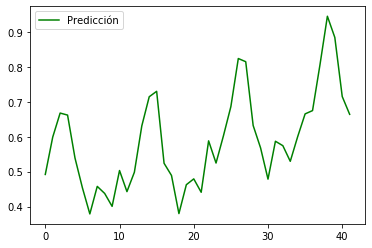

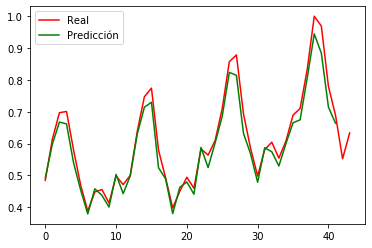

In [16]:
# Gráfica
plt.subplot(212)
plt.plot(test.reshape(44),color='red')
plt.legend(['Real'])
#plt.plot(figsize=(3000,3000))
plt.show()
plt.plot(output.reshape(42),color='green')
plt.legend([ 'Predicción'])
plt.show()
plt.plot(test.reshape(44),color='red')
plt.plot(output.reshape(42),color='green')
plt.legend(['Real', 'Predicción'])
plt.show()



3.2 Una vez compoletado el código realice los experimentos necesarios para llenar la siguiente tabla: 

In [17]:
def Simulacions(retardsOfTime,neurons):
    import neurolab as nl
    from sklearn.preprocessing import MinMaxScaler
    random.seed(19680801)
    dataset = pd.read_csv('DB/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    train_size = int(len(dataset) * 0.7)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # reshape into X=t-look_back+1:t and Y=t+1
    look_back = retardsOfTime # Retardos de tiempo por muestra
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    #Esta variable se requiere para definir la red de acuerdo con la librería neurolab. Define el número de entradas y el rango de valores que toma cada entrada
    layers = []
    look_back=retardsOfTime
    for i in range(look_back):
        layers.append([0, 1])

    # Crear la red e inicializar los pesos.
    # Create network with 2 layers
    
    net =  nl.net.newelm(layers,[neurons, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

    # Entrenar la red con los datos de entrenamiento
    # Set initialized functions and init
    net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
    net.init()
    # Train network
    error = net.train(trainX, trainY.reshape(trainX.shape[0],1), epochs=1000, show=1000, goal=0.00001)

    # Evaluar la red con los datos de test
    # Simulate network
    output = net.sim(testX)
    print ("Mape " + str(np.mean(MAPE(output,testY))))
    
    return str(np.mean(MAPE(output,testY)))

In [18]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Retardos de tiempo por muestra' : pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]),
    'Neuronas por capa' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})

df_types["MAPE"] = ""
#df_types["MAPE"][24] = "0.0000"
#print(str(df_types.index))
#df_types["MAPE"][0] = "0.124732765"
df_types.set_index(['Retardos de tiempo por muestra','Neuronas por capa'], inplace=True)
df_types.sort_index(inplace=True)
i=0
for k in df_types.index:
     print("retardos  y neuronas : "+str(k[0])+"  "+str(k[1]))
     simulacion=Simulacions(k[0],k[1])
     df_types["MAPE"][k]=simulacion

#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget
#5	0.124732765

/home/santiago/.local/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:282: DeprecationWarning: Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.
  warnings.warn("Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qgrid/grid.py:573: DeprecationWarning: metadata {'sync': True} was set from the constructor. With traitlets 4.1, metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  _df_json = Unicode('', sync=True)


retardos  y neuronas : 1  5
Epoch: 1000; Error: 0.0018801243847247878;
The maximum number of train epochs is reached
Mape 0.12473276507035648
retardos  y neuronas : 1  10
Epoch: 1000; Error: 0.0018943906077310045;
The maximum number of train epochs is reached
Mape 0.12387435250995155
retardos  y neuronas : 1  15
Epoch: 1000; Error: 0.0018780879372151161;
The maximum number of train epochs is reached
Mape 0.12494025237563555
retardos  y neuronas : 1  20
Epoch: 1000; Error: 0.0018890561770591413;
The maximum number of train epochs is reached
Mape 0.1263146658121836
retardos  y neuronas : 1  25
Epoch: 1000; Error: 0.0018899385110198173;
The maximum number of train epochs is reached
Mape 0.1259966297506807
retardos  y neuronas : 1  30
Epoch: 1000; Error: 0.001898214034863231;
The maximum number of train epochs is reached
Mape 0.12609710344748157
retardos  y neuronas : 2  5
Epoch: 1000; Error: 0.0018656854806664883;
The maximum number of train epochs is reached
Mape 0.12145274882804885
reta

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [22]:
df_types

MAPE
Retardos de tiempo por muestra Neuronas por capa                     
1                              5                  0.12473276507035648
                               10                 0.12387435250995155
                               15                 0.12494025237563555
                               20                  0.1263146658121836
                               25                  0.1259966297506807
                               30                 0.12609710344748157
2                              5                  0.12145274882804885
                               10                   0.126968824219195
                               15                  0.1178118230190535
                               20                 0.11695318783186985
                               25                 0.11738793858429569
                               30                 0.12348623729060934
3                              5                  0.12105476027980192
                               10                 0.12096757255310568
                               15                 0.11407508702126061
                               20                  0.1129700963104278
                               25                 0.11449521262915408
                               30                 0.11674891502718014
4                              5                  0.12475671628231297
                               10                  0.1259199827208433
                               15                  0.1259342977992137
                               20                 0.13075811901593054
                               25                 0.12381853036598439
                               30                 0.12787069099229303

Responda:

3.3 ¿Cuál fue la mejor configuración encontrada?

R/ La mejor configuración es en la que cuenta con 20 neuronas y tres retrasos con el valor 0.1129700963104278.

3.4 ¿Porqué seguir aumentando los tiempos de retardo no implica siempre una mejora en la predicción del modelo?

R/ Por que al tener tiempos de retardo puede haber ruido debido a el error.


## *Ejercicio 4

Este ejercicio es opcional. Use una red neuronal tipo MLP para reolver el mismo problema de predicción del número de pasajeros y compare el resultado con el obtenido usando la red recurrente.

In [20]:
# Create network with 2 layers
net = nl.net.newff([[-1, 1]] ,[1,1],transf=[nl.trans.TanSig(),nl.trans.PureLin()] )
# Train network
error = net.train(trainX, trainY.reshape(98,1), epochs = 1000, show =100)
# Simulate network
output = net.sim(test)


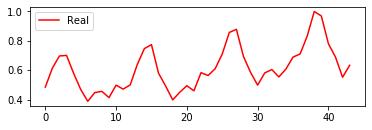

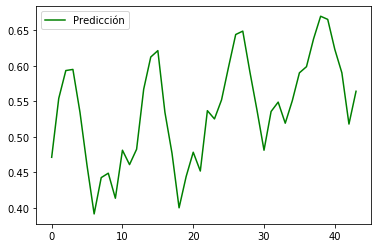

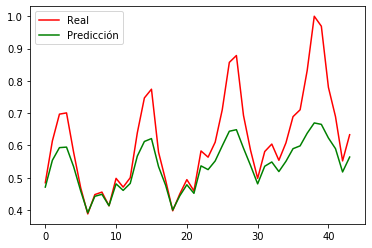

In [29]:

# Gráfica
plt.subplot(212)
plt.plot(test.reshape(44),color='red')
plt.legend(['Real'])
#plt.plot(figsize=(3000,3000))
plt.show()
plt.plot(output.reshape(44),color='green')
plt.legend([ 'Predicción'])
plt.show()
plt.plot(test.reshape(44),color='red')
plt.plot(output.reshape(44),color='green')
plt.legend(['Real', 'Predicción'])
plt.show()


In [ ]:
El trabajo con una red neuronal Tipo MLP es mas inexacto a medida que pasa el tiempo en la base de datos.